# Raphaela Challita's Open Data Project - CODE1161 | z5316585

In [82]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from pandas import DataFrame
from matplotlib import rc


In [83]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [84]:
saved_style_state = matplotlib.rcParams.copy() 

In [85]:
filepath = "XLS_files\walmart_chart.xlsx"
print("loading from file")

walmart_chart = pd.read_excel(filepath)
print("done")

loading from file
done


In [86]:
walmart_chart.head(50)

,Year,US$ Bn
0,2006,308.95
1,2007,344.76
2,2008,373.82
3,2009,401.09
4,2010,404.74
5,2011,418.50
6,2012,443.42
7,2013,465.60
8,2014,473.08
9,2015,482.23


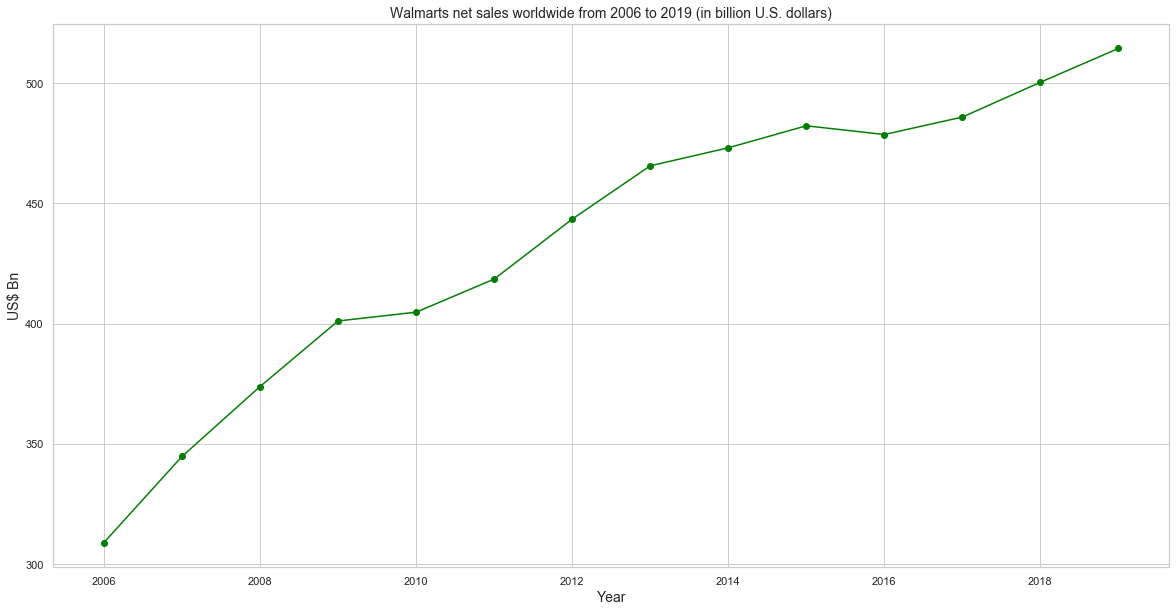

In [87]:

Data = {'Year': [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
        'US$ Bn': [308.95, 344.76, 373.82, 401.09, 404.74, 418.50, 443.42, 465.60, 473.08, 482.23, 478.61, 485.87, 500.34, 514.41]
       }
  
df = pd.DataFrame(Data,columns=['Year','US$ Bn'])
  
plt.plot(df['Year'], df['US$ Bn'], color='green', marker='o')
plt.title('Walmarts net sales worldwide from 2006 to 2019 (in billion U.S. dollars)', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('US$ Bn', fontsize=14)
plt.grid(True)
plt.show()

In [88]:
from pandas import ExcelWriter
from pandas import ExcelFile

excel_data_df = pd.read_excel('XLS_files\walmart_chart.xlsx', sheet_name='Chart 2', skiprows= 1)

In [89]:
# Walmart's net sales worldwide from 2008 to 2019, by division (in billion U.S. dollars)

In [90]:
excel_data_df.head(50)

,US$ Bn,Walmart U.S.,Walmart International,Sam's Club
0,2008,238.92,90.57,44.34
1,2009,256.97,96.14,47.98
2,2010,259.92,97.41,47.81
3,2011,260.26,109.23,49.46
4,2012,264.19,125.44,53.80
5,2013,274.43,134.75,56.42
6,2014,279.41,136.51,57.16
7,2015,288.05,136.16,58.02
8,2016,298.38,123.41,56.83
9,2017,307.83,116.12,57.37


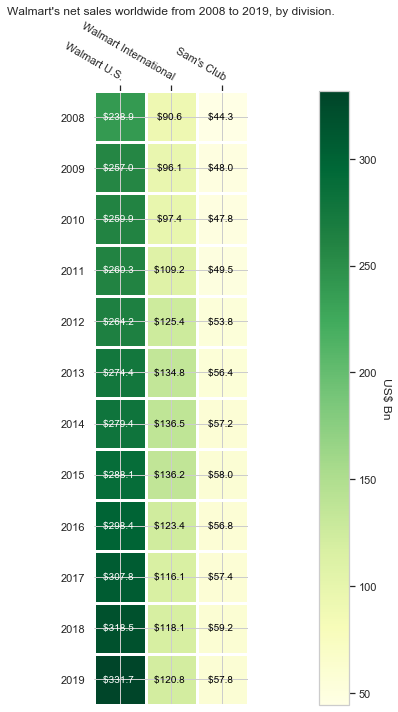

In [91]:
matplotlib.axes.Axes.imshow
matplotlib.pyplot.imshow
matplotlib.figure.Figure.colorbar
matplotlib.pyplot.colorbar


year = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
company = ["Walmart U.S.", "Walmart International", "Sam's Club"]

dollar = np.array([[238.92, 90.57, 44.34],
                    [256.97, 96.14, 47.98],
                    [259.92, 97.41, 47.81],
                    [260.26, 109.23, 49.46],
                    [264.19, 125.44, 53.80],
                    [274.43, 134.75, 56.42],
                    [279.41, 136.51, 57.16],
                    [288.05, 136.16, 58.02],
                    [298.38, 123.41, 56.83],
                    [307.83, 116.12, 57.37],
                    [318.48, 118.07, 59.22],                    
                    [331.67, 120.82, 57.84]])
        

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    
    if not ax:
        ax = plt.gca()

    im = ax.imshow(data, **kwargs)

    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

   
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

fig, ax = plt.subplots()

im, cbar = heatmap(dollar, year, company, ax=ax,
                   cmap="YlGn", cbarlabel="US$ Bn")
texts = annotate_heatmap(im, valfmt="${x:.1f} ")

ax.set_title("Walmart's net sales worldwide from 2008 to 2019, by division.")
fig.tight_layout()
plt.show()


In [92]:
from pandas import ExcelWriter
from pandas import ExcelFile

excel_data_df = pd.read_excel('XLS_files\walmart_chart.xlsx', sheet_name='Chart 5', skiprows= 1)

In [93]:
# Share of Walmart's net sales from 2008 to 2019, by division

In [94]:
excel_data_df.head(50)

,Year,Walmart U.S.,Walmart International,Sam's Club
0,2008,0.639,0.242,0.119
1,2009,0.640,0.240,0.120
2,2010,0.642,0.240,0.118
3,2011,0.621,0.261,0.118
4,2012,0.596,0.283,0.121
5,2013,0.590,0.289,0.121
6,2014,0.590,0.289,0.121
7,2015,0.598,0.282,0.120
8,2016,0.623,0.258,0.119
9,2017,0.640,0.241,0.119


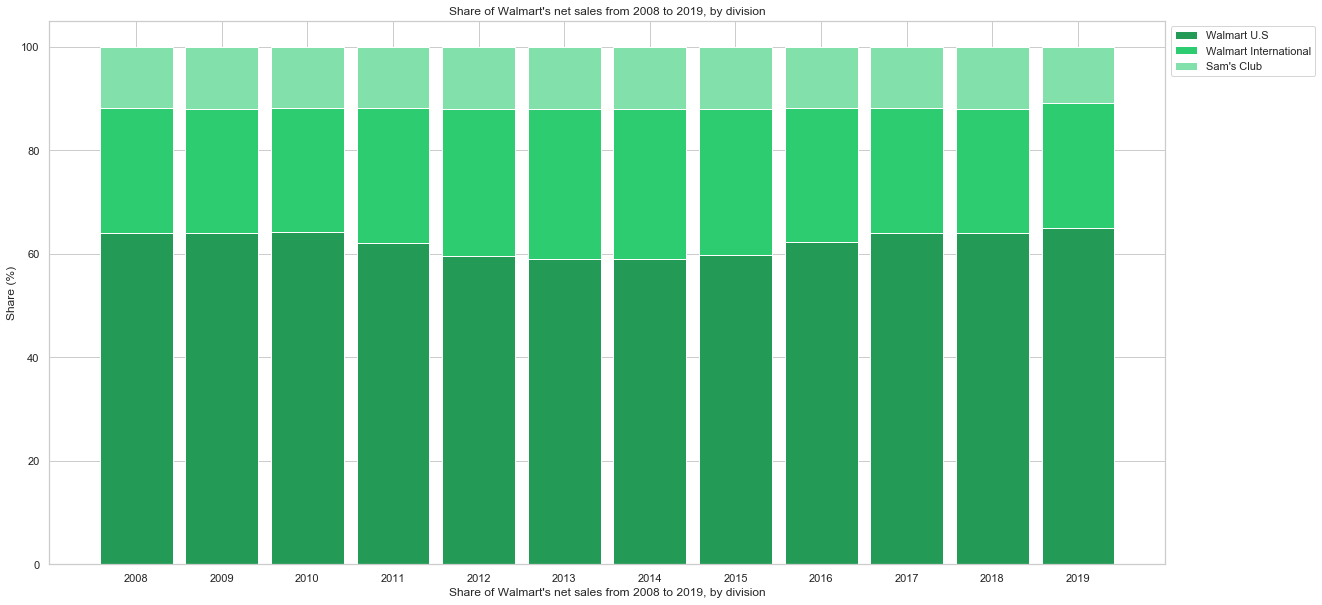

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
r = [0,1,2,3,4,5,6,7,8,9,10,11]
raw_data = {'greenBars': [63.9, 64.0, 64.2, 62.1, 59.6, 59.0, 59.0, 59.8, 62.3, 64.0, 64.0, 65.0], 'orangeBars': [24.2, 24.0, 24.0, 26.1, 28.3,  28.9, 28.9, 28.2, 25.8, 24.1, 24.0, 24.0],'blueBars': [11.9, 12.0, 11.8, 11.8, 12.1, 12.1, 12.1, 12.0, 11.9, 11.9, 12.0, 11.0]}
df = pd.DataFrame(raw_data)
 
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
 
barWidth = 0.85
names = ('2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019')

plt.bar(r, greenBars, color='#239B56', edgecolor='white', width=barWidth, label="Walmart U.S")
plt.bar(r, orangeBars, bottom=greenBars, color='#2ECC71', edgecolor='white', width=barWidth, label="Walmart International")
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#82E0AA', edgecolor='white', width=barWidth, label="Sam's Club")
 
plt.xticks(r, names)
plt.xlabel("Share of Walmart's net sales from 2008 to 2019, by division")
 
plt.ylabel('Share (%)')

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
plt.title("Share of Walmart's net sales from 2008 to 2019, by division")
plt.show()


In [96]:
excel_data_df = pd.read_excel('XLS_files\walmart_chart.xlsx', sheet_name='Chart 4', skiprows= 1)


In [97]:
# Growth in Walmart's net sales worldwide from 2006 to 2019

In [98]:
excel_data_df.head(50)

,Year,Growth in net sales
0,2006,0.098
1,2007,0.116
2,2008,0.084
3,2009,0.073
4,2010,0.009
5,2011,0.034
6,2012,0.060
7,2013,0.050
8,2014,0.016
9,2015,0.019


In [99]:
excel_data_df = pd.read_excel('XLS_files\walmart_chart.xlsx', sheet_name='Chart 6', skiprows= 1)

Walmart's gross profit margin worldwide from 2006 to 2019

In [100]:
excel_data_df.head(50)

,Year,Gross profit margin
0,2006,0.231
1,2007,0.234
2,2008,0.241
3,2009,0.243
4,2010,0.249
5,2011,0.248
6,2012,0.245
7,2013,0.243
8,2014,0.243
9,2015,0.243


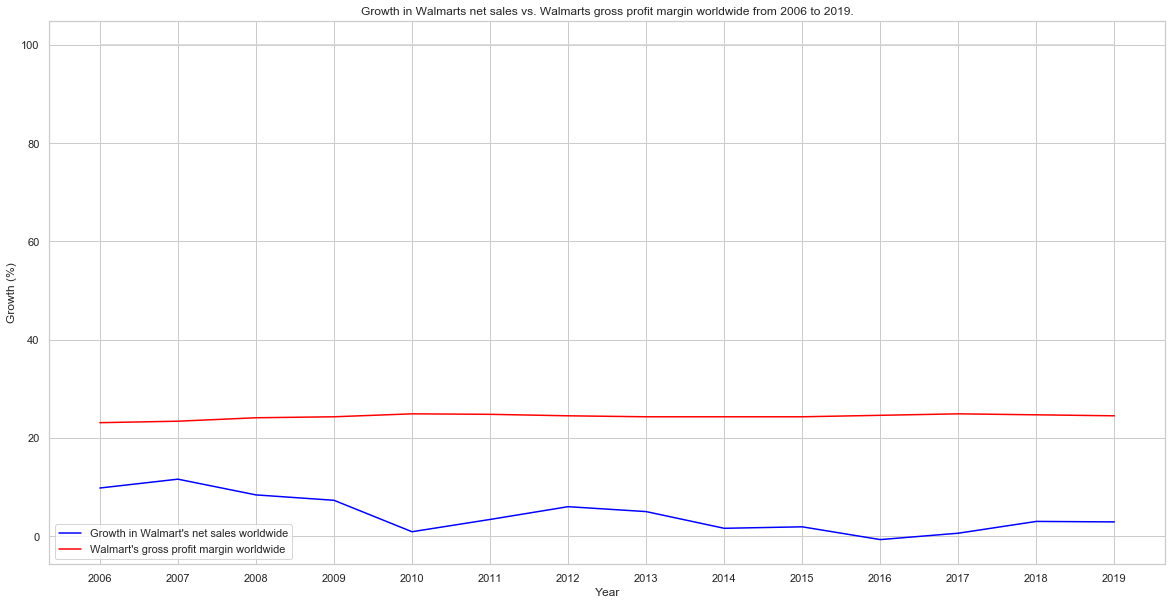

In [101]:
import matplotlib.pyplot as plt
x1 = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
y1 = [9.8, 11.6, 8.4, 7.3, 0.9, 3.4, 6.0, 5.0, 1.6, 1.9, -0.7, 0.6, 3.0, 2.9]

x2 = ['2006', '2007','2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
y2 = [23.10, 23.40, 24.10, 24.30, 24.90, 24.80, 24.50, 24.30, 24.30, 24.30, 24.60, 24.90, 24.70, 24.50]

x3 = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
y3 = [99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9]
plt.plot(x3, y3, color='lightgrey')
plt.plot(x1, y1, label = "Growth in Walmart's net sales worldwide", color='blue' )
plt.plot(x2, y2, label = "Walmart's gross profit margin worldwide", color='red' )
plt.xlabel('Year')
plt.ylabel('Growth (%)')
plt.title('Growth in Walmarts net sales vs. Walmarts gross profit margin worldwide from 2006 to 2019.')
plt.legend()
plt.grid(True)
plt.show()


In [102]:
excel_data_df = pd.read_excel('XLS_files\walmart_chart.xlsx', sheet_name='Chart 9', skiprows= 1)

In [103]:
excel_data_df.head(50)

,Year,Spending in US$ Bn
0,2009,2.04
1,2010,2.06
2,2011,1.82
3,2012,1.81
4,2013,1.93
5,2014,1.94
6,2015,2.09
7,2016,2.17
8,2017,2.28


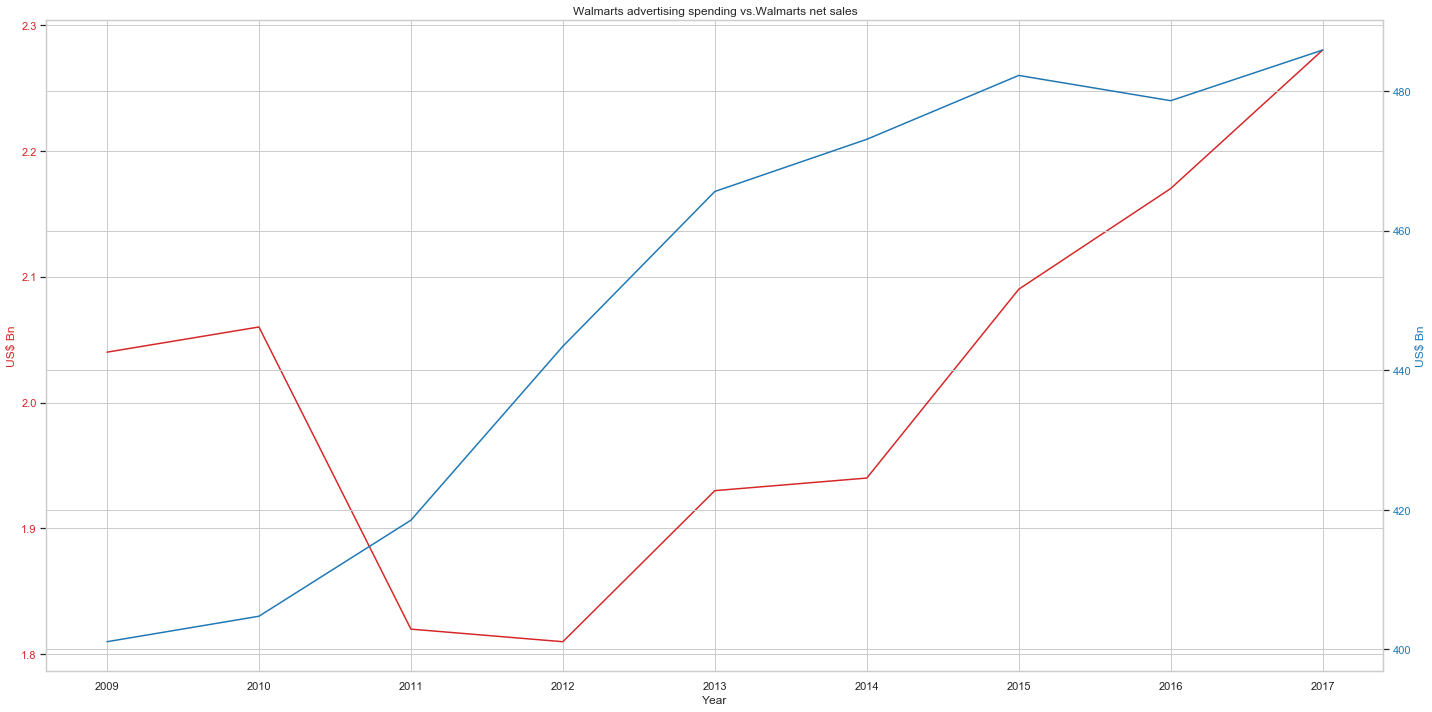

In [104]:
year = ('2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017')
y_pos = np.arange(len(year))
data1 = (2.04, 2.06, 1.82, 1.81, 1.93, 1.94, 2.09, 2.17, 2.28)
data2 = (401.09, 404.74, 418.50, 443.42, 465.60, 473.08, 482.23, 478.61, 485.87)


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('US$ Bn', color=color)
ax1.plot(year, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 
color = 'tab:blue'
ax2.set_ylabel('US$ Bn', color=color) 
ax2.plot(year, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Walmarts advertising spending vs.Walmarts net sales')

fig.tight_layout() 
plt.show()

In [105]:
excel_data_df = pd.read_excel('XLS_files\walmart_chart.xlsx', sheet_name='Chart 10', skiprows= 1)

In [106]:
excel_data_df.head(50)

,Year,Number of stores
0,2008,7288
1,2009,7909
2,2010,8099
3,2011,8604
4,2012,9766
5,2013,10408
6,2014,10942
7,2015,11453
8,2016,11528
9,2017,11695


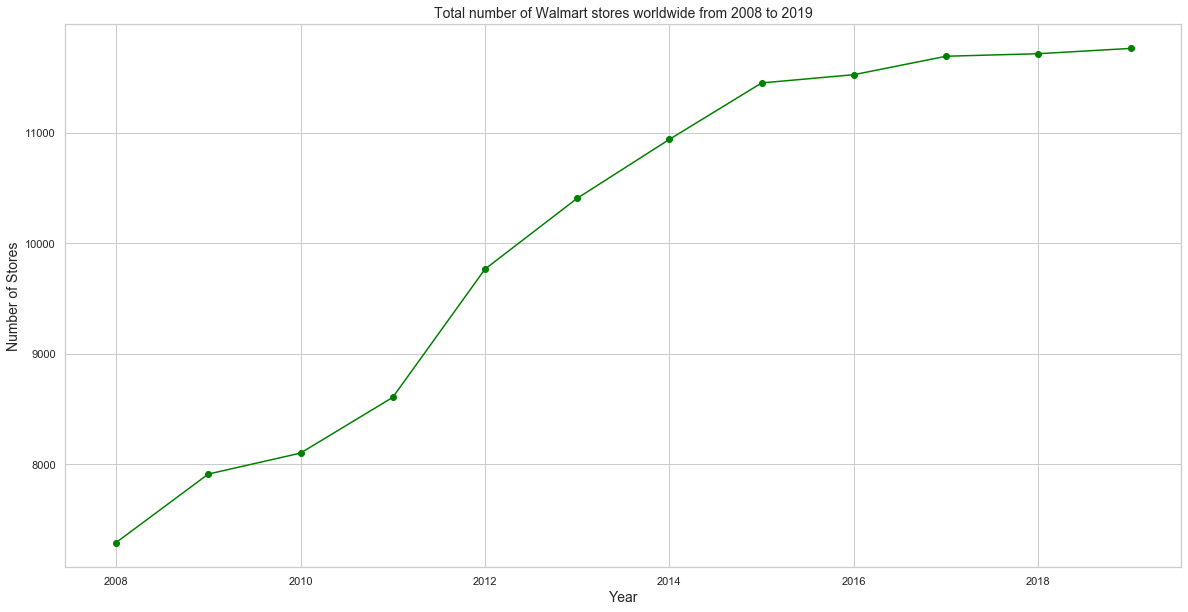

In [107]:
Data = {'Year': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
        'Number of Stores': [7288, 7909, 8099,8604, 9766, 10408, 10942, 11453, 11528, 11695, 11718, 11766]
       }
  
df = pd.DataFrame(Data,columns=['Year','Number of Stores'])
  
plt.plot(df['Year'], df['Number of Stores'], color='green', marker='o')
plt.title('Total number of Walmart stores worldwide from 2008 to 2019', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Stores', fontsize=14)
plt.grid(True)
plt.show()

In [108]:
excel_data_df = pd.read_excel('XLS_files\walmart_chart.xlsx', sheet_name='Chart 11')

In [109]:
excel_data_df.head(50)

,Year,Walmart U.S. segment,Walmart International segment,Sam`s Club segment
0,2006,3289,2158,567
1,2007,3488,2733,588
2,2008,3595,3093,600
3,2009,3703,3595,611
4,2010,3755,4099,605
5,2011,3804,4557,609
6,2012,3868,5287,611
7,2013,4005,5783,620
8,2014,4203,6107,632
9,2015,4516,6290,647


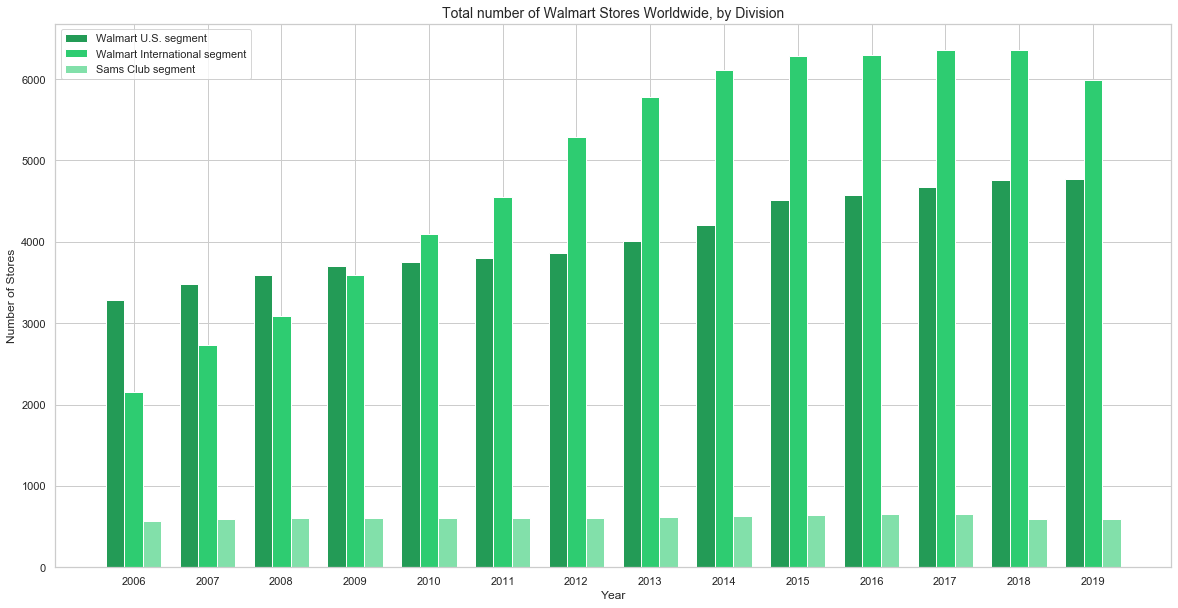

In [110]:
import numpy as np
import matplotlib.pyplot as plt
barWidth = 0.25
bars1 = [3289, 3488, 3595, 3703, 3755, 3804, 3868, 4005, 4203, 4516, 4574, 4672, 4761, 4769]
bars2 = [2158, 2733, 3093, 3595, 4099, 4557, 5287, 5783, 6107, 6290, 6299, 6363, 6360, 5993]
bars3 = [567, 588, 600, 611, 605, 609, 611, 620, 632, 647, 655, 660, 597, 599]
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.bar(r1, bars1, color='#239B56', width=barWidth, edgecolor='white', label='Walmart U.S. segment')
plt.bar(r2, bars2, color='#2ECC71', width=barWidth, edgecolor='white', label='Walmart International segment')
plt.bar(r3, bars3, color='#82E0AA', width=barWidth, edgecolor='white', label='Sams Club segment')
 
plt.xlabel('Year')
plt.xticks([r + barWidth for r in range(len(bars1))], ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'])
plt.ylabel('Number of Stores')
plt.title('Total number of Walmart Stores Worldwide, by Division', fontsize=14)
plt.legend()
plt.show()


In [111]:
excel_data_df = pd.read_excel('XLS_files\walmart_chart.xlsx', sheet_name='Chart 12', skiprows= 1)

In [112]:
excel_data_df.head(50)

,Country,Number of stores
0,Africa,436
1,Argentina,92
2,Canada,411
3,Central America**,811
4,Chile,371
5,China,443
6,India,22
7,Japan,332
8,Mexico,2442
9,United States,4756


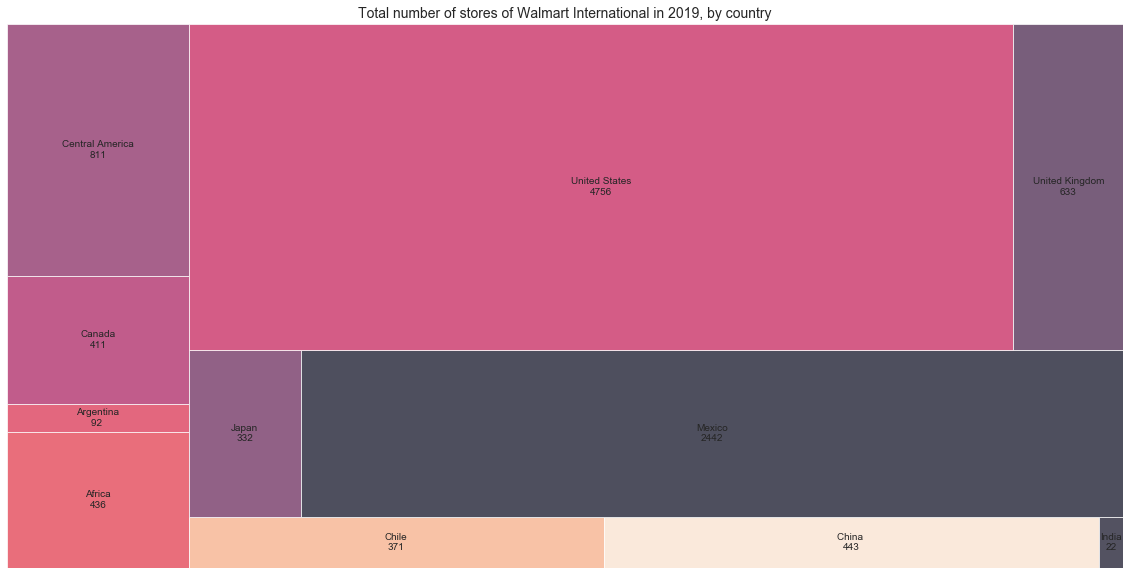

In [113]:
import squarify  
 
squarify.plot(sizes=[436, 92, 411, 811, 371, 443, 22, 332, 2442, 4756, 633], label=["Africa\n436", "Argentina\n92 ", "Canada\n411", "Central America\n811", "Chile\n371", "China \n443", "India\n22", "Japan\n332", "Mexico\n2442", "United States\n4756", "United Kingdom\n633"], alpha=.7)
plt.axis('off')
plt.title('Total number of stores of Walmart International in 2019, by country', fontsize=14)
plt.show()
 


In [114]:
excel_data_df = pd.read_excel('XLS_files\walmart_chart.xlsx', sheet_name='Chart 13', skiprows= 1)

In [115]:
excel_data_df.head(52)

,Country,No. of Stores
0,Texas,329
1,Florida,191
2,California,167
3,Illinois,137
4,Ohio,136
5,Georgia,128
6,Pennsylvania,119
7,North Carolina,118
8,Missouri,117
9,Tennesse,104


In [116]:
excel_data_df = pd.read_excel('XLS_files\walmart_chart.xlsx', sheet_name='Chart 14', skiprows= 1)

In [117]:
excel_data_df.head(52)

,Country,No. of Stores
0,Texas,392
1,Florida,231
2,California,142
3,Illinois,139
4,Ohio,139
5,Georgia,154
6,Pennsylvania,116
7,North Carolina,144
8,Missouri,112
9,Tennesse,117


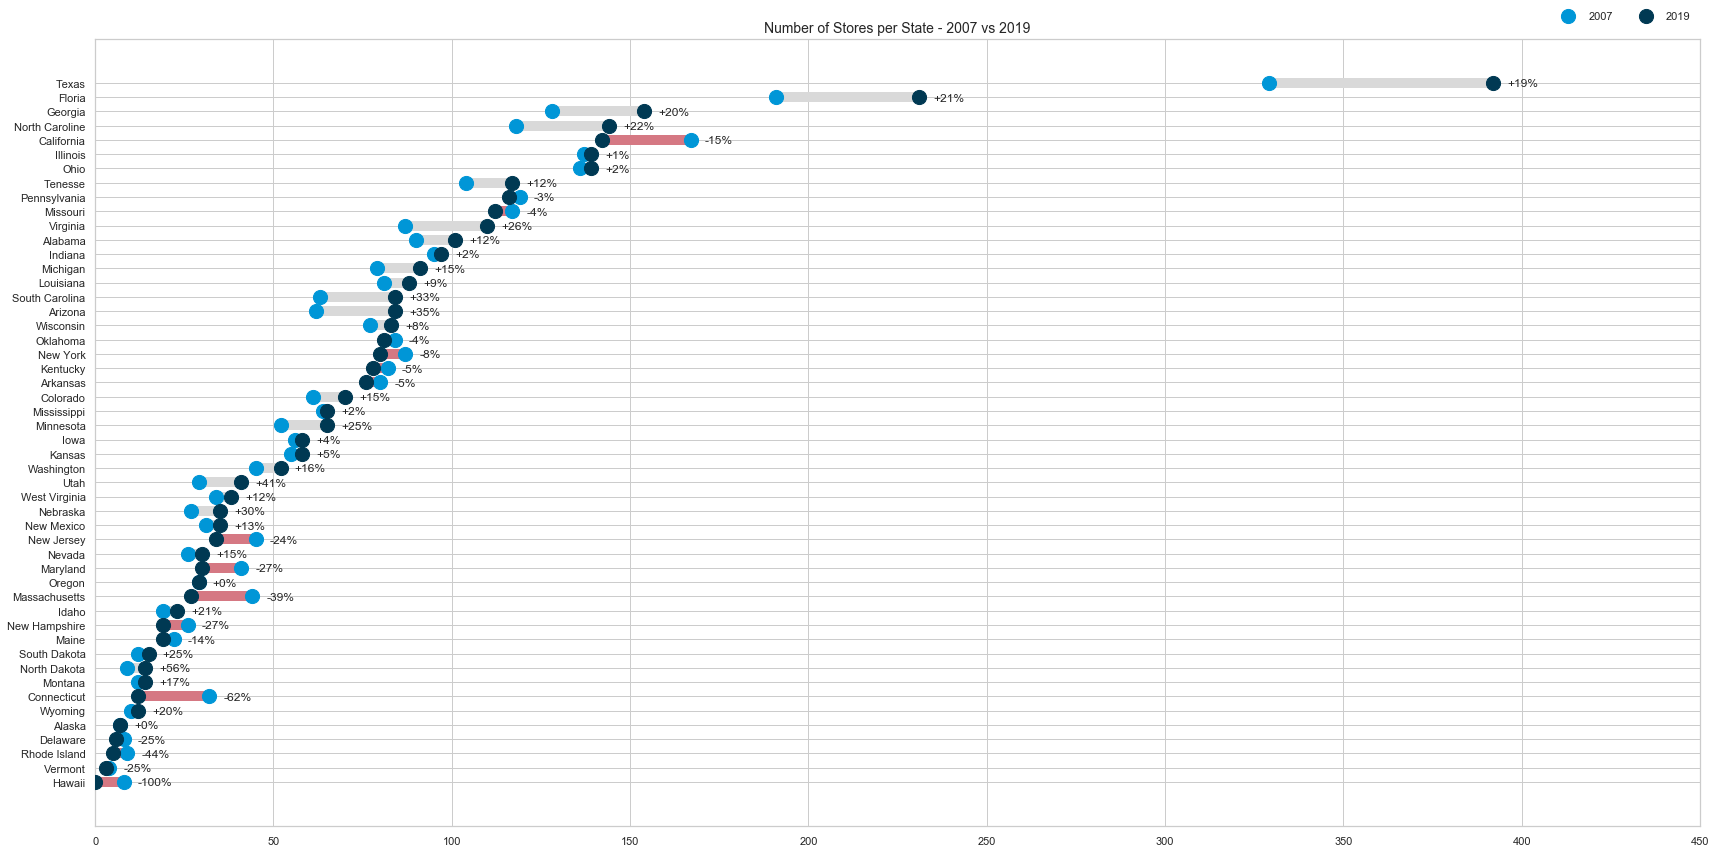

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
sns.set(style="whitegrid")  # set style

data = io.StringIO(""""State"  2007  2019
"Texas" 329 392
"Floria" 191 231
"California" 167 142
"Illinois" 137 139
"Ohio" 136 139
"Georgia" 128 154
"Pennsylvania" 119 116
"North Caroline" 118 144
"Missouri" 117 112
"Tenesse" 104 117
"Indiana" 95 97
"Alabama" 90 101
"New York" 87 80
"Virginia" 87 110
"Oklahoma" 84 81
"Kentucky" 82 78
"Louisiana" 81 88
"Arkansas" 80 76
"Michigan" 79 91
"Wisconsin" 77 83
"Mississippi" 64 65
"South Carolina" 63 84
"Arizona" 62 84
"Colorado" 61 70
"Iowa" 56 58
"Kansas" 55 58
"Minnesota" 52 65
"New Jersey" 45 34
"Washington" 45 52
"Massachusetts" 44 27
"Maryland" 41 30
"West Virginia" 34 38
"Connecticut" 32 12
"New Mexico" 31 35
"Oregon" 29 29 
"Utah" 29 41
"Nebraska" 27 35
"Nevada" 26 30
"New Hampshire" 26 19
"Maine" 22 19
"Idaho" 19 23
"Montana" 12 14
"South Dakota" 12 15
"Wyoming" 10 12
"North Dakota" 9 14
"Rhode Island" 9 5
"Delaware" 8 6
"Hawaii" 8 0
"Alaska" 7 7
"Vermont" 4 3""")

df = pd.read_csv(data, sep="\s+", quotechar='"')
df = df.set_index("State").sort_values("2019")
df["change"] = df["2019"] / df["2007"] - 1


plt.figure(figsize=(24, 12))
y_range = np.arange(1, len(df.index) + 1)
colors = np.where(df['2019'] > df['2007'], '#d9d9d9', '#d57883')
plt.hlines(y=y_range, xmin=df['2007'], xmax=df['2019'],
           color=colors, lw=10)
plt.scatter(df['2007'], y_range, color='#0096d7', s=200, label='2007', zorder=3)
plt.scatter(df['2019'], y_range, color='#003953', s=200 , label='2019', zorder=3)
for (_, row), y in zip(df.iterrows(), y_range):
    plt.annotate(f"{row['change']:+.0%}", (max(row["2007"], row["2019"]) + 4, y - 0.25))
plt.legend(ncol=2, bbox_to_anchor=(1., 1.01), loc="lower right", frameon=False)

plt.yticks(y_range, df.index)
plt.title("Number of Stores per State - 2007 vs 2019", fontsize= 14)
plt.xlim(0, 450)
plt.gcf().subplots_adjust(left=0.35)
plt.tight_layout()
plt.show()